### 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．
なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [1]:
!sudo apt-get update && sudo apt install -y libmecab-dev mecab mecab-ipadic-utf8 
!mkdir -p data/chapter4 && wget -O ./data/chapter4/neko.txt https://nlp100.github.io/data/neko.txt
!cat data/chapter4/neko.txt | mecab > ./data/chapter4/neko.txt.mecab

Get:1 http://deb.debian.org/debian bullseye InRelease [116 kB]
Get:2 http://deb.debian.org/debian-security bullseye-security InRelease [48.4 kB]
Get:3 http://deb.debian.org/debian bullseye-updates InRelease [44.1 kB]
Get:4 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]
Get:5 http://deb.debian.org/debian bullseye/main amd64 Packages [8062 kB]
Get:6 http://deb.debian.org/debian-security bullseye-security/main amd64 Packages [259 kB]
Get:7 http://deb.debian.org/debian bullseye-updates/main amd64 Packages [17.7 kB]
Get:8 https://dl.yarnpkg.com/debian stable/main all Packages [10.9 kB]
Get:9 https://dl.yarnpkg.com/debian stable/main amd64 Packages [10.9 kB]
Fetched 8585 kB in 5s (1573 kB/s)               
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages w

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



In [6]:
sentences = []
morphs = []

with open('./data/chapter4/neko.txt.mecab') as f:
    for line in f:
        if line == 'EOS\n':
            sentences.append(morphs)
            morphs = []
        else:
            splitted = line.split('\t')
            if len(splitted) < 2 or splitted[0] == '':
                continue
            surface = splitted[0]
            elems = splitted[1].split(',')
            morphs.append({'surface': surface, 'base': elems[6], 'pos': elems[0], 'pos1': elems[1]})

### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [9]:
verbs_surface = []

for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verbs_surface.append(morph['surface'])

print(verbs_surface)

['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい',
 '見',
 '見',
 '思っ',
 '残っ',
 'いる',
 'さ',
 'れ',
 'し',
 '逢っ',
 '出会わ',
 'し',
 'のみ',
 'なら',
 'し',
 'いる',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'おっ',
 'する',
 'し',
 '始め',
 '動く',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '助から',
 '思っ',
 'いる',
 'さり',
 'し',
 '出',
 'し',
 'いる',
 '考え出そ',
 '分ら',
 '付い',
 '見る',
 'い',
 'おっ',
 '見え',
 '隠し',
 'しまっ',
 '違っ',
 '明い',
 'い',
 'られ',
 '這い出し',
 '見る',
 '棄て',
 'られ',
 '這い出す',
 'ある',
 '坐っ',
 'し',
 '考え',
 '見',
 '出',
 'し',
 '泣い',
 '来',
 'くれる',
 '考え付い',
 'やっ',
 '見',
 '来',
 '渡っ',
 'かかる',
 '減っ',
 '来',
 '泣き',
 '出',
 'ある',
 'ある',
 'し',
 'そろ',
 '廻り',
 '始め',
 'し',
 '這っ',
 '行く',
 '出',
 '這入っ',
 'なる',
 '思っ',
 '崩れ',
 'もぐり込ん',
 '破れ',
 'い',
 'し',
 '知れ',
 '云っ',
 '至る',
 'する',
 'なっ',
 'いる',
 '忍び込ん',
 '分ら',
 'なる',
 '減る',
 '降っ',
 '来る',
 '出来',
 'なっ',
 'あるい',
 '行く',
 '考える',
 '這入っ',
 'おっ',
 '見る',
 'し',
 '逢っ',
 '見る',
 'つかん',
 '抛り出し',
 '思っ',
 'ねぶっ',
 '任せ',
 'い',
 '出来

### 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．



In [10]:
verbs_base = []

for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verbs_base.append(morph['base'])

print(verbs_base)

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える', '煮る', '食う', '思う', '載せる', 'られる', '持ち上げる', 'られる', 'する', 'ある', '落ちつく', '見る', '見る', '思う', '残る', 'いる', 'する', 'れる', 'する', '逢う', '出会う', 'する', 'のむ', 'なる', 'する', 'いる', '吹く', 'する', '弱る', '飲む', '知る', '坐る', 'おる', 'する', 'する', '始める', '動く', '動く', '分る', '廻る', 'なる', '助かる', '思う', 'いる', 'さる', 'する', '出る', 'する', 'いる', '考え出す', '分る', '付く', '見る', 'いる', 'おる', '見える', '隠す', 'しまう', '違う', '明く', 'いる', 'られる', '這い出す', '見る', '棄てる', 'られる', '這い出す', 'ある', '坐る', 'する', '考える', '見る', '出る', 'する', '泣く', '来る', 'くれる', '考え付く', 'やる', '見る', '来る', '渡る', 'かかる', '減る', '来る', '泣く', '出る', 'ある', 'ある', 'する', 'そる', '廻る', '始める', 'する', '這う', '行く', '出る', '這入る', 'なる', '思う', '崩れる', 'もぐり込む', '破れる', 'いる', 'する', '知れる', '云う', '至る', 'する', 'なる', 'いる', '忍び込む', '分る', 'なる', '減る', '降る', '来る', '出来る', 'なる', 'あるく', '行く', '考える', '這入る', 'おる', '見る', 'する', '逢う', '見る', 'つかむ', '抛り出す', '思う', 'ねぶる', '任せる', 'いる', '出来る', '見る', '這う', '上る', '投げ出す', 'れる', '投げ出す', 'れる', '這う', '上る', '這う', '上る', '投げ出す', 'れる', '

### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [14]:
b_of_a = []

for sentence in sentences:
    for i in range(1, len(sentence)-1):
        prev = sentence[i-1]
        now = sentence[i] 
        nxt = sentence[i+1]
        if prev['pos'] == '名詞' and now['pos'] == '助詞' and now['base'] == 'の' and nxt['pos'] == '名詞':
            b_of_a.append(prev['surface'] + now['surface'] + nxt['surface'])

print(b_of_a)



['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一', '例の神経', '性の主人', '次の部屋', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '向の白', '玉のよう', 'そこの家', '家の書生', '裏の池', '親子の愛', 'もっともの議論', '刺の頭', '鰡の臍', '彼等のため', '軍人の家', '代言の主人', '教師の家', '猫の時節', '吾輩の家', '家の主人', 'だらけの英文', '胃弱の癖', '後架の中', '平の宗', '月の月給', '当分の間', '下のよう', '今更のよう', '主人の述懐', '彼の友', '金縁の眼鏡', '主人の顔', '内の想像', '訳のもの', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '不器量の吾輩', '吾輩の主人', '斯産の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '人の気', '彼の背中', 'こっちの便利', '自己の力量', '人間の不徳', '吾輩の家', '家の裏', '浩然の気', '小春の穏', '日の二', '茶の木の根', '西側の杉', '垣のそば', '他の庭', '純粋の黒', '彼の皮膚', '皮膚の上',

### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [23]:
connected = []

for sentence in sentences:
  nouns = ''
  count = 0
  for morph in sentence:
    if morph['pos'] == '名詞':
      nouns += morph['surface']
      count += 1
    elif count >= 2:
      connected.append(nouns)
      nouns = ''
      count = 0
    else:
      nouns = ''
      count = 0

print(connected)

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所', '三

### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [29]:
word_freq = {}

for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      if morph['base'] in word_freq:
        word_freq[morph['base']] += 1
      else:
        word_freq[morph['base']] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
print(sorted_word_freq)

[('の', 9194), ('て', 6848), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5972), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*\n', 2191), ('で', 2084), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('これ', 414), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), ('ごとし', 261), ('さん', 260), ('気', 250), ('猫', 248), ('だけ', 246), ('たい', 241), ('また

### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [41]:
%pip install japanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


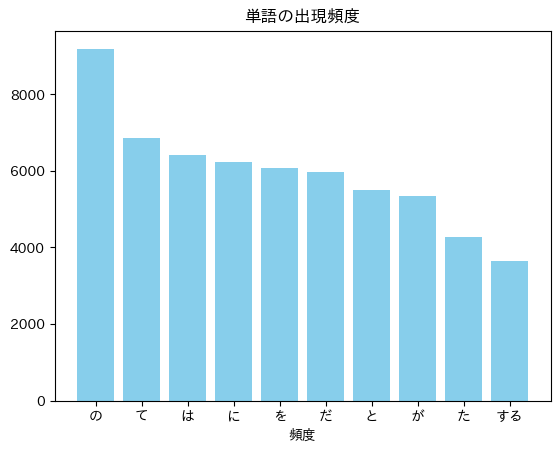

In [34]:
import matplotlib.pyplot as plt
import japanize_matplotlib

words, frequencies = zip(*sorted_word_freq[0:10])

plt.bar(words, frequencies, color='skyblue')
plt.xlabel('頻度')
plt.title('単語の出現頻度')
plt.show()

###  37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

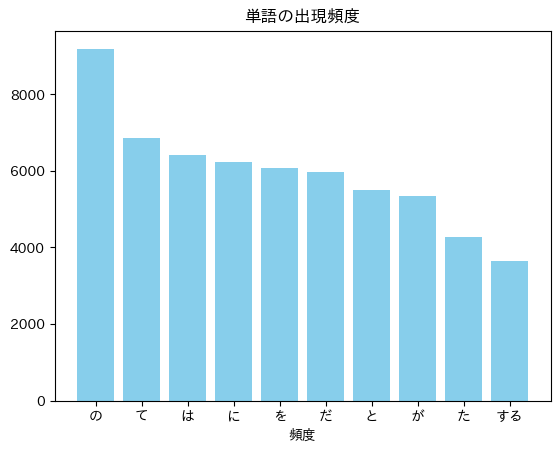

In [37]:
import matplotlib.pyplot as plt
import japanize_matplotlib

neko_colocation = {}

for sentence in sentences:
    if '猫' in [morph['surface'] for morph in sentence]:
        for morph in sentence:
            if morph['pos'] != '記号':
                if morph['base'] in neko_colocation:
                    neko_colocation[morph['base']] += 1
                else:
                    neko_colocation[morph['base']] = 1

del neko_colocation['猫']
sorted_neko_colocation = sorted(neko_colocation.items(), key=lambda x: x[1], reverse=True)
words, frequencies = zip(*sorted_word_freq[0:10])

plt.bar(words, frequencies, color='skyblue')
plt.xlabel('頻度')
plt.title('単語の出現頻度')
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

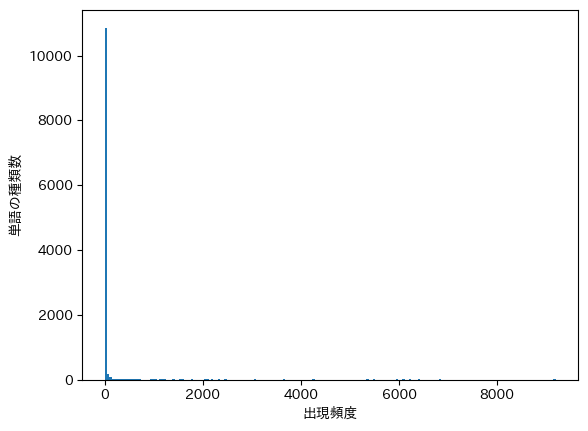

In [40]:
from collections import defaultdict 

word_freq = defaultdict(int)
for sentence in sentences:
  for morph in sentence:
    if morph['pos'] != '記号':
      word_freq[morph['base']] += 1

plt.hist(word_freq.values(), bins=200)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．